# FM modulation of square carrier by an sinusoidal signal

Python code exemplifing how to make the modulation.

In [126]:
# Python code to make a square-wave carrier modulated with a sinusoidal signal.

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

freq_signal   = 1   # Sgnal frequency      1 Hz
freq_carrier  = 25  # Carrier frequency   25 Hz
freq_sampling = 500 # Sampling frequency 500 Hz
t = np.arange(0, 2.0, 1.0/freq_sampling) # Time duaration defined

amp_signal  = 1
amp_carrier = 1


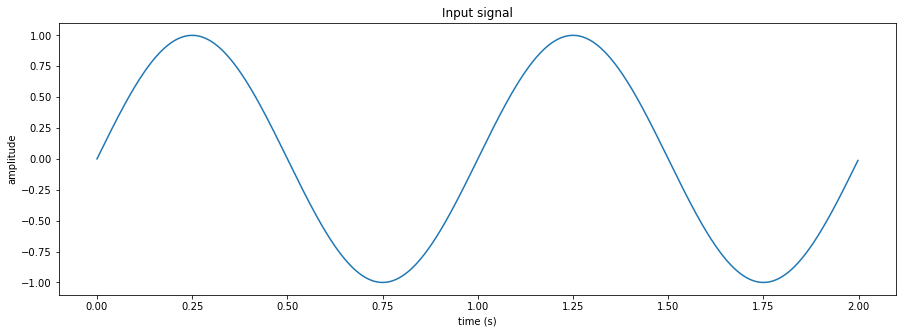

In [127]:
# The input signal.

x = amp_signal*np.sin(2*np.pi*freq_msg*t)

plt.figure(figsize=(15, 5))
plt.title('Input signal')
plt.ylabel('amplitude')
plt.xlabel('time (s)')
plt.plot(t,x)
plt.show()

In [128]:
# Square wave function.
def square(values):
    # values: numpy array between -inf and +inf.
    # returns a array of values of -1 if it is the interval[0, pi[ and -1 if it is in the interval [pi, 2*pi] 
    values_res = values.copy()
    for i in range(0, len(values)):
        val = values[i] / (math.pi* 2.0)
        # The decimal part of the division.
        val = val - math.floor(val)
        val = val * (math.pi* 2.0)
        if (val >= 0.0 and val < math.pi):
            values_res[i] = 1.0
        elif (val >= math.pi) and (val <= (math.pi * 2.0)):
            values_res[i] = -1.0
    return values_res  

# Square wave function, vectorized.
def square_a(values):
    # values: numpy array between -inf and +inf.
    # returns a array of values of -1 if it is the interval[0, pi[ and -1 if it is in the interval [pi, 2*pi]
    values_res = values.copy()
    values_tmp = values / (np.pi * 2.0)
    # returns the decimal part of the division.
    values_tmp = values_tmp - np.floor(values_tmp)
    values_tmp = values_tmp * (math.pi* 2.0)
    a = np.logical_and(values_tmp >= 0.0, values_tmp < np.pi)
    b = np.logical_and(values_tmp >= np.pi, values_tmp <= (np.pi * 2.0))
    values_tmp[a] = 1.0
    values_tmp[b] = -1.0
    return values_tmp  


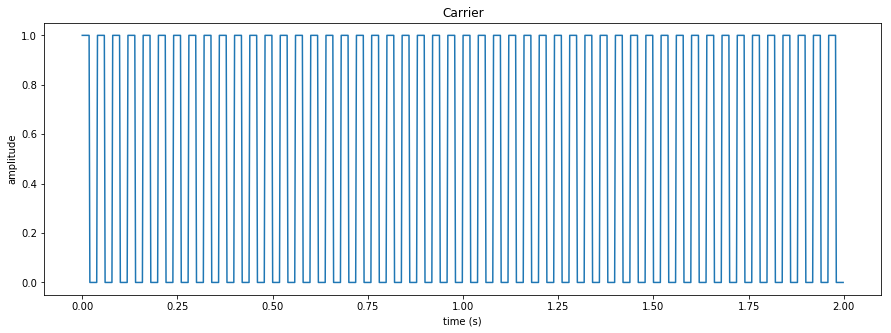

In [129]:
# The carrier signal

y = amp_carrier + amp_carrier * square_a(2*np.pi*freq_carrier*t)
y = y / 2.0

plt.figure(figsize=(15, 5))
plt.title('Carrier')
plt.ylabel('amplitude')
plt.xlabel('time (s)')
plt.plot(t,y)
plt.show()

In [130]:
# The cumulative sum function.
def cumsum(values):
    # values: numpy array of values in 1D.
    # returns a array of comunalite sum values. 
    values_res = np.zeros(len(values))
    acum = 0.0
    for i in range(0, len(values)):
        acum += values[i] 
        values_res[i] = acum
    return values_res      

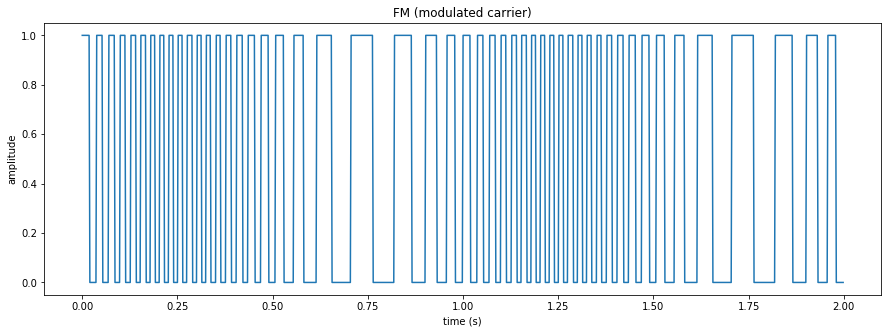

In [131]:
# The FM modulation.

x_modulating = x / max(x)     # Unit normalized modulating signal (necessery for the comulative sum)
freq_dev = freq_carrier / 1.5 # Frequency deviation limited to a maximum of 2/3 deviation from the carrier frequency
# Generating FM signal
z = amp_carrier + amp_carrier * square (2 * np.pi * freq_carrier * t + 2 * np.pi *
                                        freq_dev * (cumsum(x_modulating) / freq_sampling) )
z = z / 2

plt.figure(figsize=(15, 5))
plt.title('FM (modulated carrier)')
plt.ylabel('amplitude')
plt.xlabel('time (s)')
plt.plot(t,z)
plt.show()


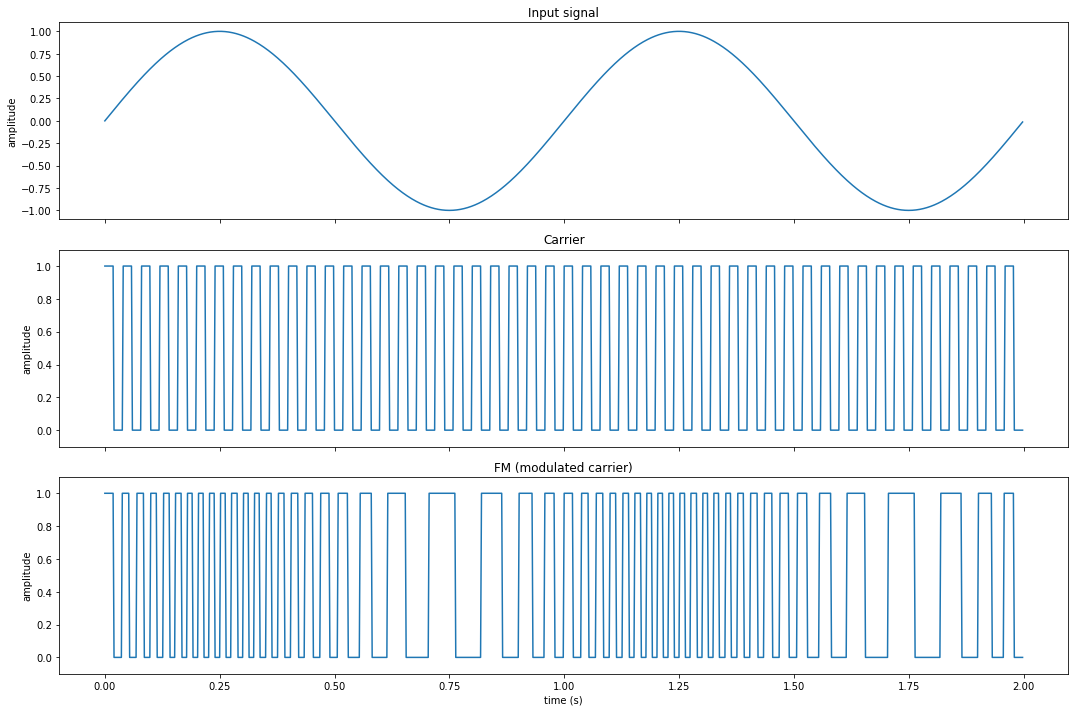

In [132]:
# The tree plot's in the same image.
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(3, sharex=True, figsize=(15, 10))
axarr[0].set_title('Input signal')
axarr[0].set_ylim([np.min(x)-0.1, np.max(x)+0.1])
axarr[0].set_ylabel('amplitude')
axarr[0].plot(t, x)

axarr[1].set_title('Carrier')
axarr[1].set_ylim([np.min(y)-0.1, np.max(y)+0.1])
axarr[1].set_ylabel('amplitude')
axarr[1].plot(t, y)

axarr[2].set_title('FM (modulated carrier)')
axarr[2].set_ylim([np.min(z)-0.1, np.max(z)+0.1])
axarr[2].set_ylabel('amplitude')
axarr[2].plot(t, z)

axarr[2].set_xlabel('time (s)')
f.tight_layout()
plt.show()



# This code can be used to...

...implement the following paper with a microcontroller, a RF switch and an antenna made of aluminum foil.

[FM BackscatterEnabling Connected cities and Smart Fabrics](http://smartcities.cs.washington.edu/)


# All code in this notebook has the MIT license.

# This notebook was inspired by the following article...

[Frequency modulation in gnu-octave : square wave carrier and sinusoidal message](http://thottingal.in/blog/2014/05/31/frequencymodulation_in_octave/)